In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import datetime
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

font_name = font_manager.FontProperties(fname='./malgun.ttf').get_name()
rc('font', family=font_name)

C:\Users\hajae\anaconda3\envs\pydatavenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hajae\anaconda3\envs\pydatavenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\hajae\anaconda3\envs\pydatavenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
pop = pd.read_csv('./result/LOCAL_PEOPLE_DONG_202104.csv', sep=',', encoding='utf-8')

In [4]:
pop['dt'] = pd.to_datetime(pop['기준일ID'], format='%Y%m%d')

In [5]:
pop['day'] = pop['dt'].apply(lambda x: x.weekday())

In [6]:
pop['시군구코드'] = pop['행정동코드'].apply(lambda x: str(x)[:5])

In [7]:
pop['10세미만생활인구'] = pop['남자0세부터9세생활인구수'] + pop['여자0세부터9세생활인구수']

In [8]:
pop.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',
       'dt', 'day', '시군구코드', '10세미만생활인구'],
      dtype='object')

In [9]:
m_pop = pop.groupby(['day', '시간대구분', '시군구코드', '행정동코드'])[['총생활인구수', '10세미만생활인구']].mean()

## 요일별

In [10]:
m_pop.reset_index(inplace=True)

In [11]:
시군구_요일별 = m_pop.groupby(['시군구코드', 'day'])[['총생활인구수', '10세미만생활인구']].mean().reset_index()

In [12]:
종로구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11110']
중구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11140']
용산구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11170']
성동구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11200']
광진구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11215']
동대문구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11230']
중랑구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11260']
성북구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11290']
강북구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11305']
도봉구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11320']
노원구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11350']
은평구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11380']
서대문구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11410']
마포구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11440']
양천구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11470']
강서구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11500']
구로구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11530']
금천구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11545']
영등포구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11560']
동작구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11590']
관악구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11620']
서초구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11650']
강남구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11680']
송파구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11710']
강동구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11740']

### 종로구

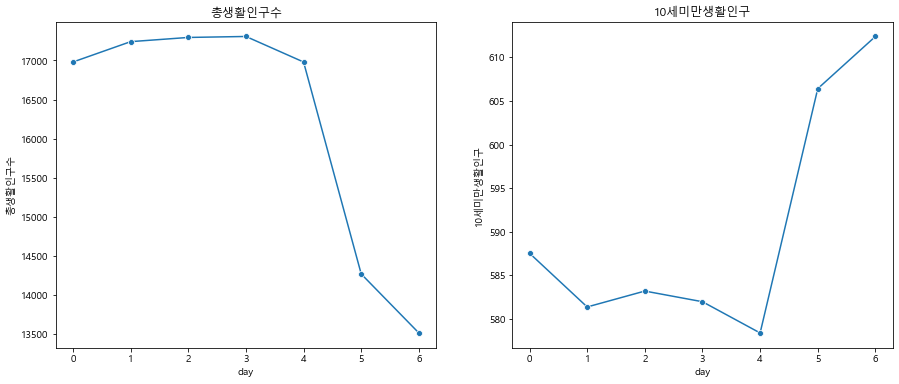

In [13]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=종로구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=종로구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 중구

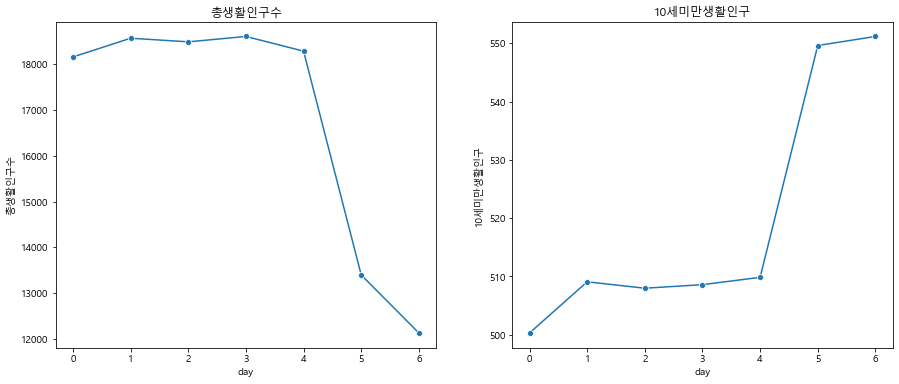

In [14]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=중구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=중구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 용산구

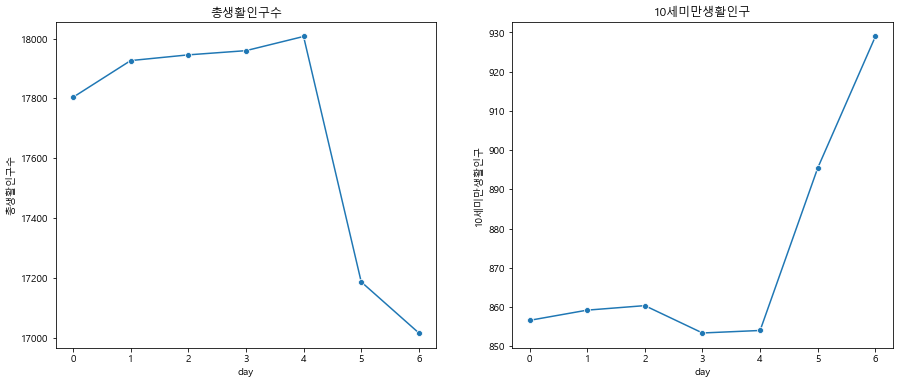

In [15]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=용산구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=용산구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 성동구

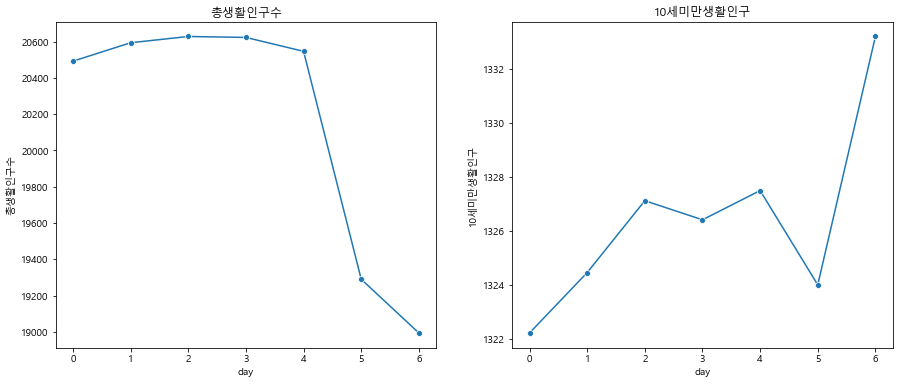

In [16]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=성동구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=성동구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 광진구

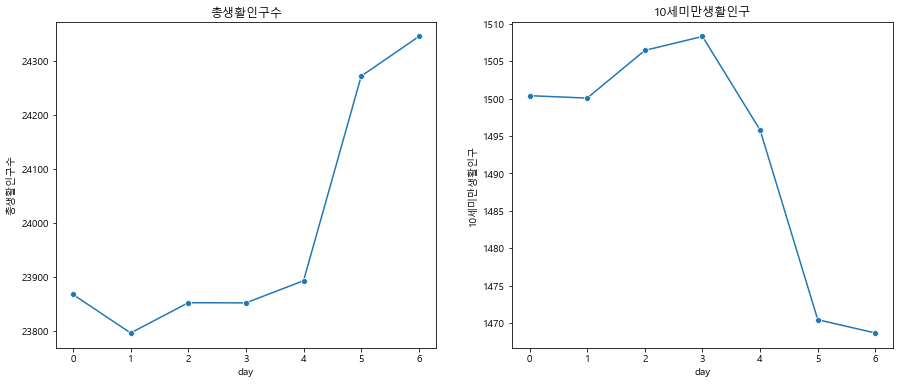

In [17]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=광진구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=광진구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 동대문구

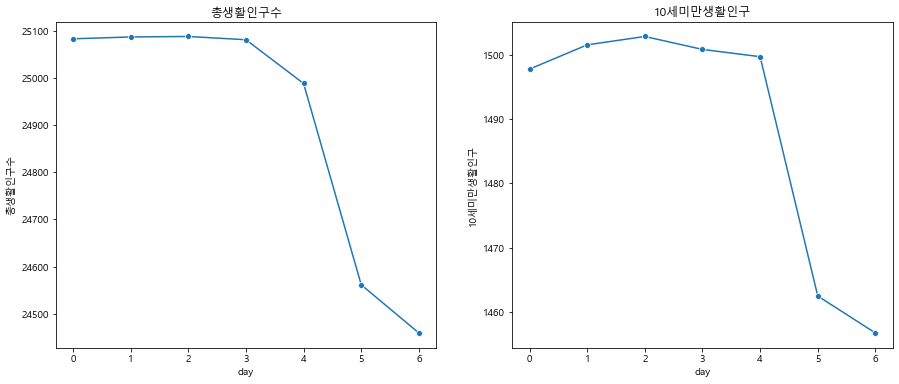

In [18]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=동대문구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=동대문구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 중랑구

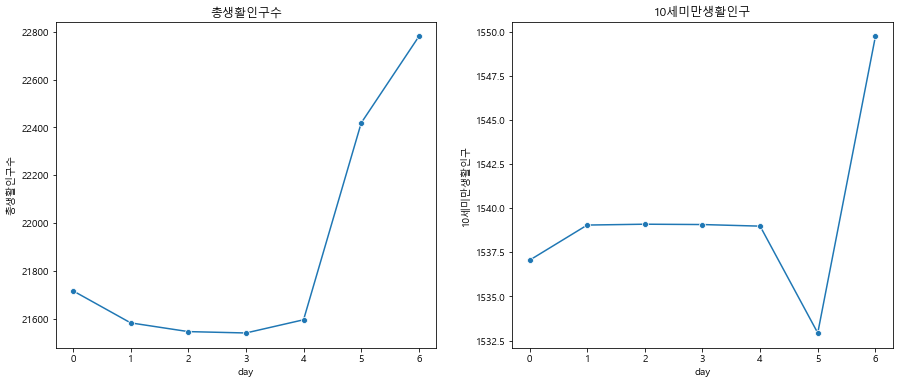

In [19]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=중랑구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=중랑구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 성북구

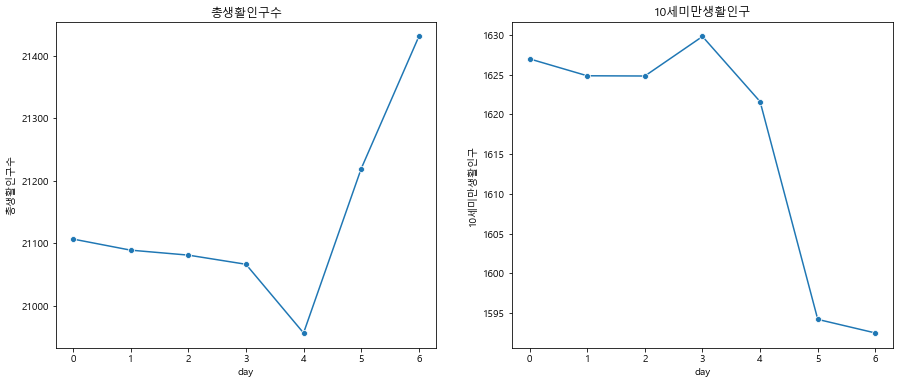

In [20]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=성북구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=성북구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 강북구

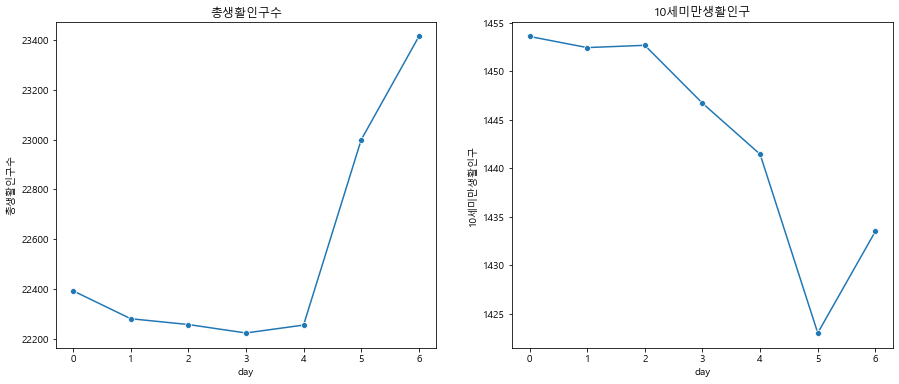

In [21]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=강북구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=강북구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 도봉구

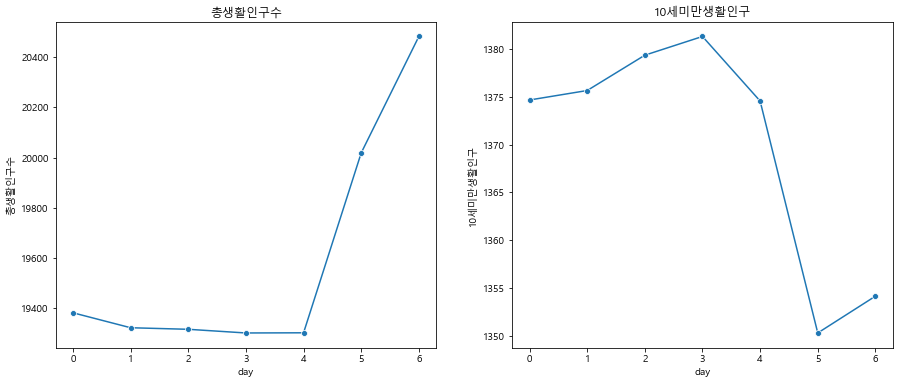

In [22]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=도봉구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=도봉구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 노원구

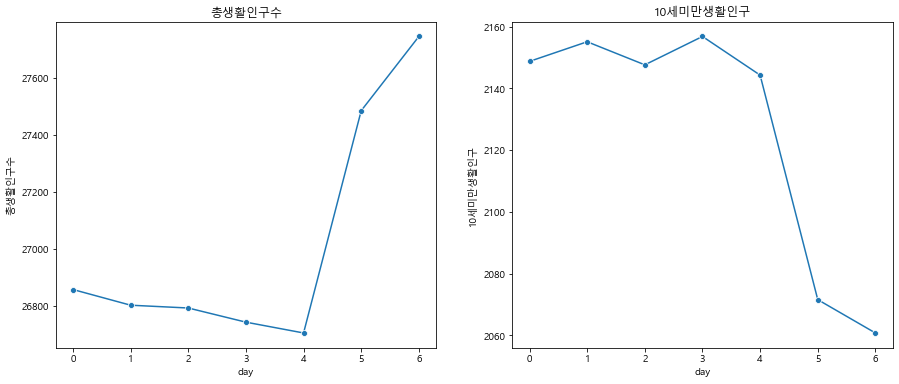

In [23]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=노원구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=노원구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 은평구

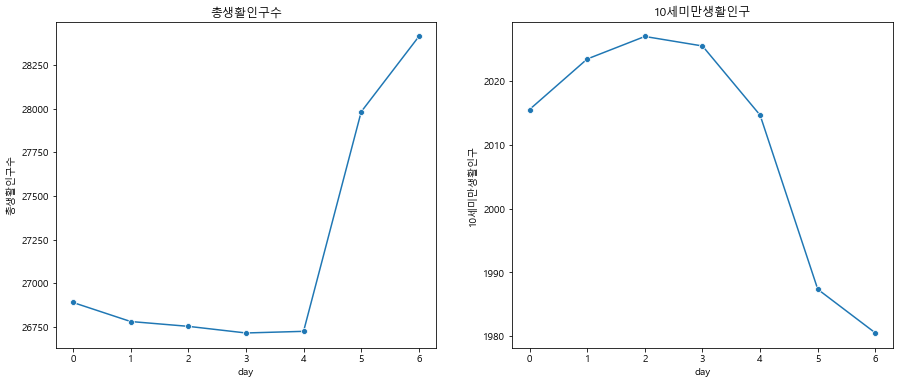

In [24]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=은평구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=은평구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 서대문구

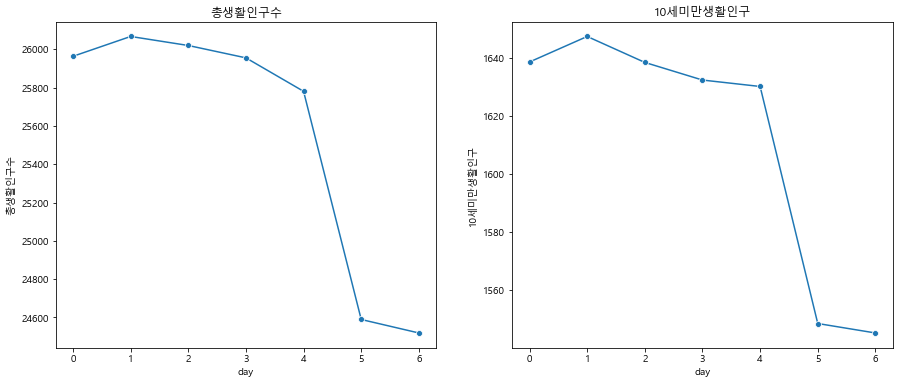

In [25]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=서대문구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=서대문구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 마포구

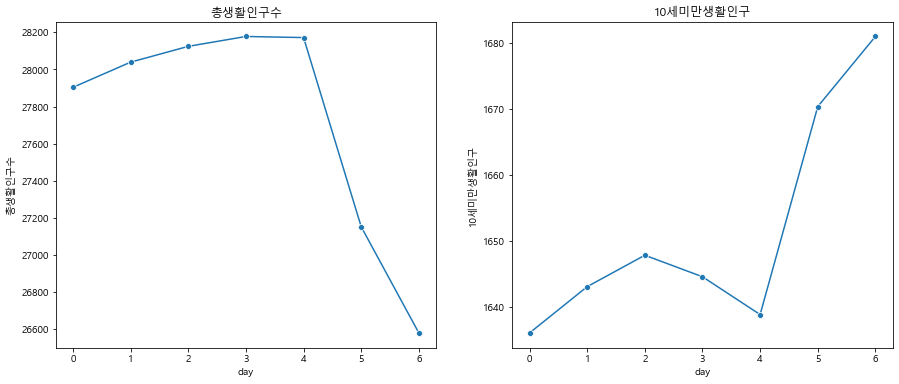

In [26]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=마포구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=마포구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 양천구

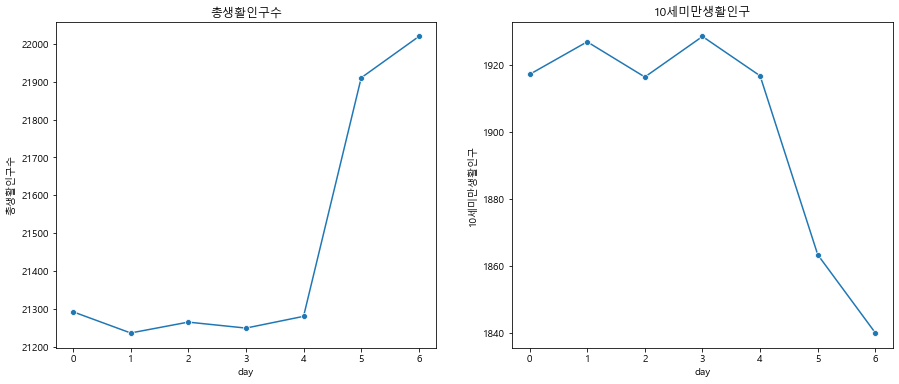

In [27]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=양천구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=양천구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 강서구

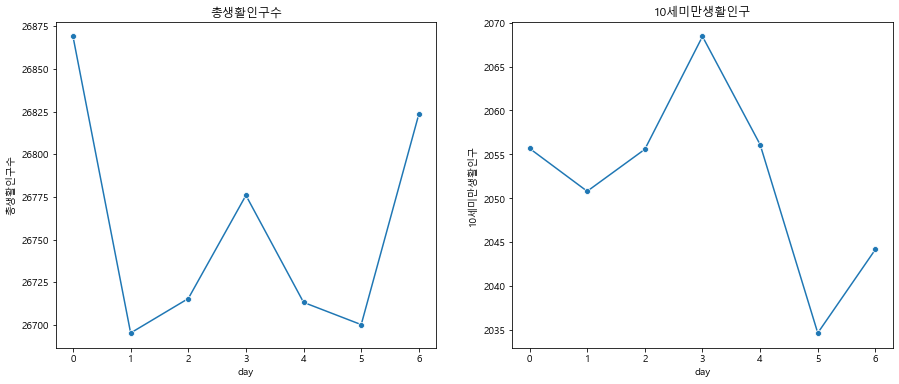

In [28]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=강서구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=강서구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 구로구

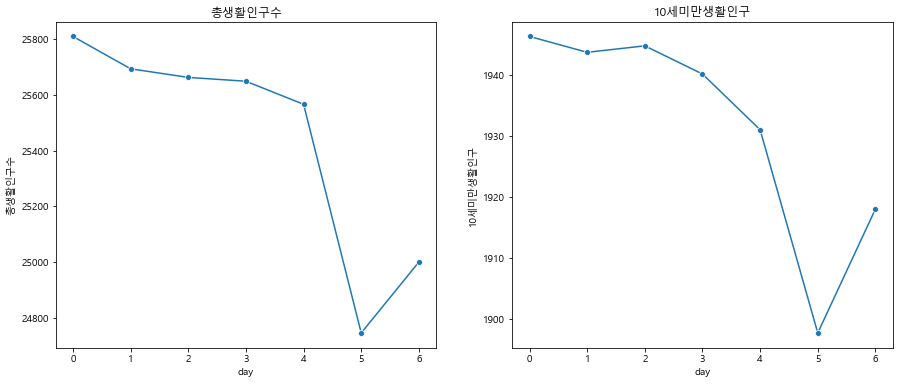

In [29]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=구로구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=구로구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 금천구

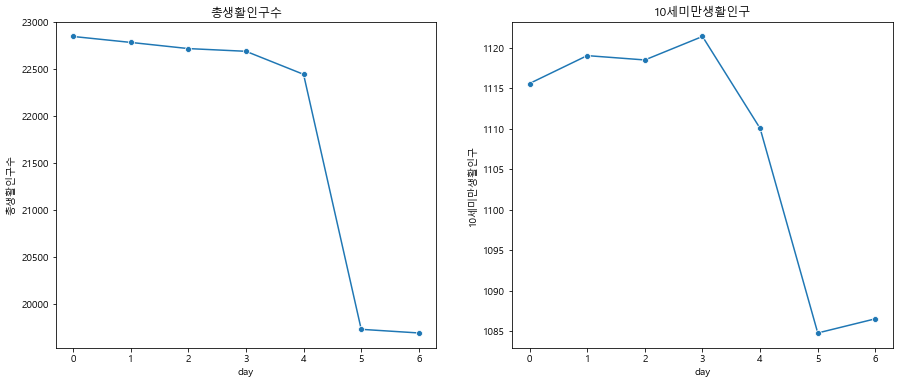

In [30]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=금천구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=금천구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 영등포구

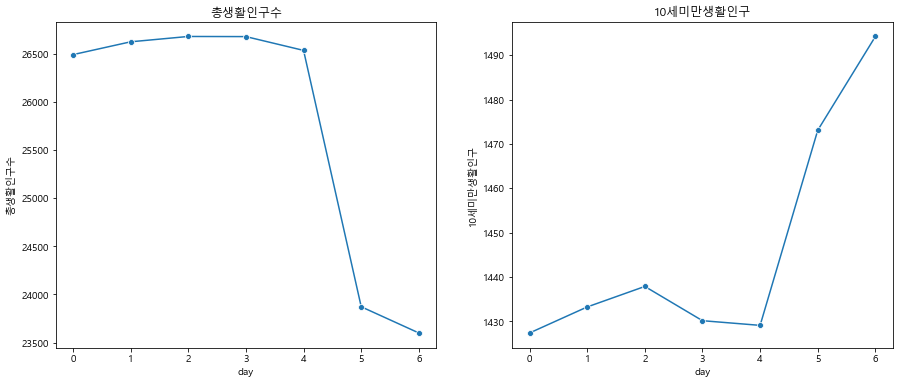

In [31]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=영등포구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=영등포구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 동작구

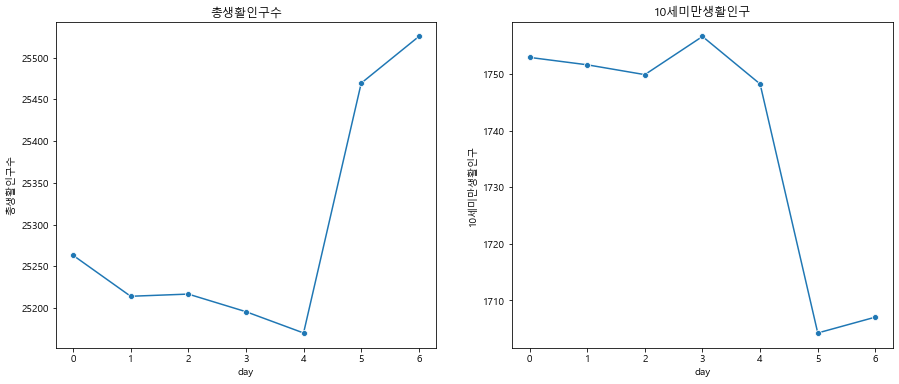

In [32]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=동작구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=동작구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 관악구

In [1]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
g = sns.lineplot(x='day', y='총생활인구수', data=관악구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=관악구, marker='o', ax = axes[1])
g.set_xticks(range(24))
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

NameError: name 'plt' is not defined

### 서초구

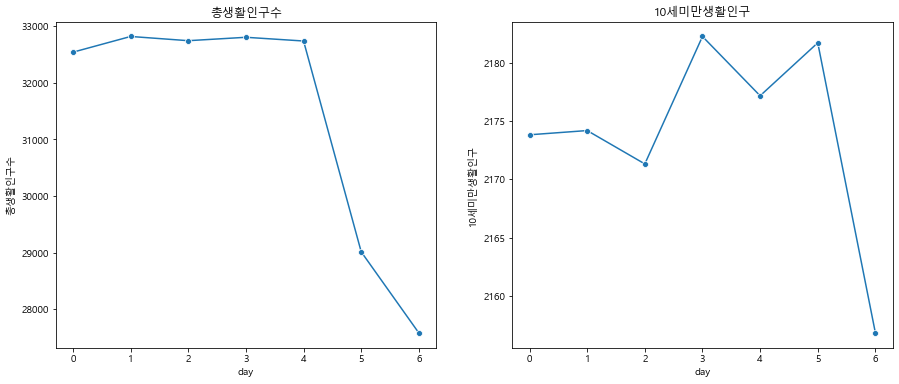

In [34]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=서초구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=서초구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 강남구

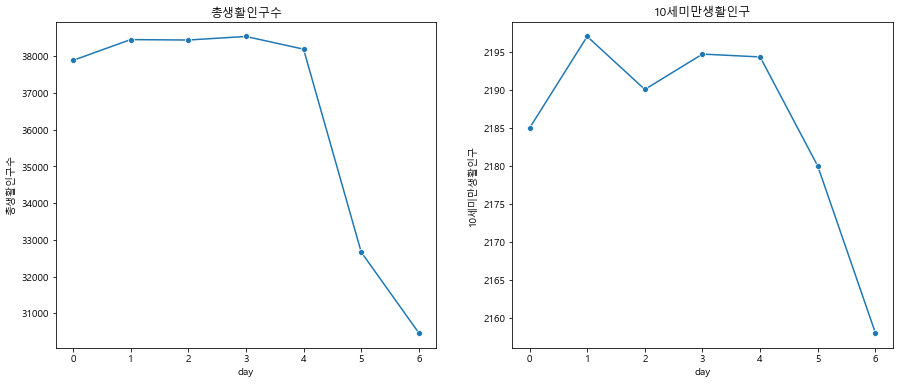

In [35]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=강남구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=강남구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 송파구

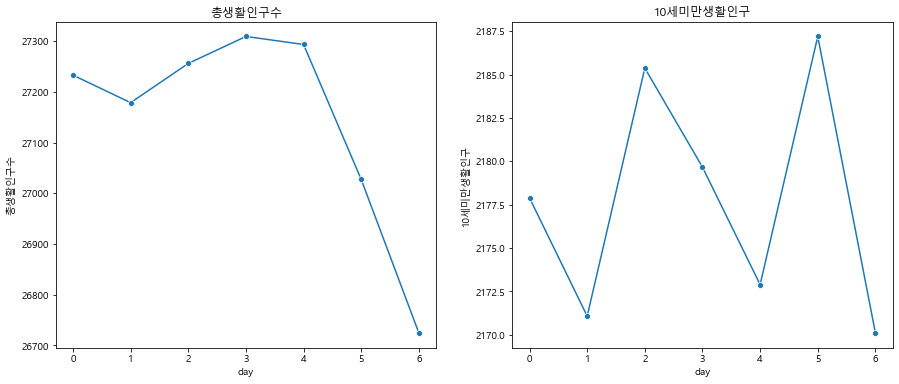

In [36]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=송파구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=송파구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()

### 강동구

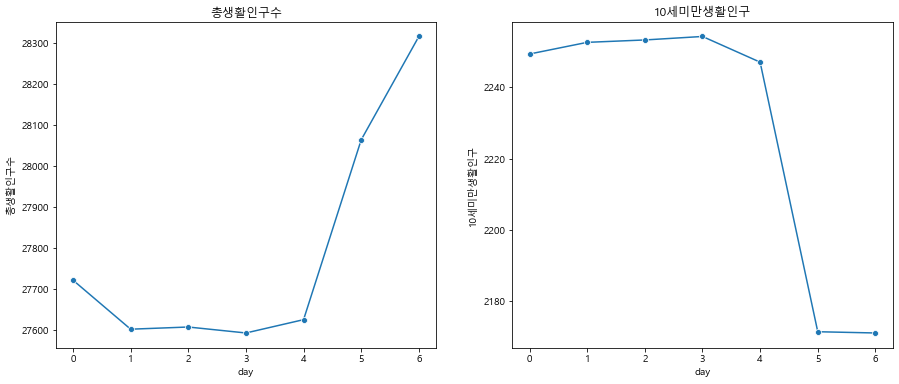

In [37]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=강동구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=강동구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.show()